In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All"
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/heart-attack-analysis-prediction-dataset/o2Saturation.csv
/kaggle/input/heart-attack-analysis-prediction-dataset/heart.csv


# **intro of heart disease**
##### A heart attack occurs when the flow of blood to the heart is severely reduced or blocked. The blockage is usually due to a buildup of fat, cholesterol and other substances in the heart (coronary) arteries. The fatty, cholesterol-containing deposits are called plaques. The process of plaque buildup is called atherosclerosis. Sometimes, a plaque can rupture and form a clot that blocks blood flow. A lack of blood flow can damage or destroy part of the heart muscle.

# **About dataset**
0. **Dataset:** the dataset is related to the Heart Attack
1. **age:** Age of the patient
2. **sex:** Sex of the patient
3. **cp:** Chest pain type, 0 = Typical Angina, 1 = Atypical Angina, 2 = Non-anginal Pain, 3 = Asymptomatic
4. **trtbps:** Resting blood pressure (in mm Hg)
5. **chol:** Cholestoral in mg/dl fetched via BMI sensor
6. **fbs:** (fasting blood sugar > 120 mg/dl), 1 = True, 0 = False
7. **restecg:** Resting electrocardiographic results, 0 = Normal, 1 = ST-T wave normality, 2 = Left ventricular hypertrophy
8. **thalachh:** Maximum heart rate achieved
9. **oldpeak:** Previous peak
10. **exng:** Exercise induced angina ~ 1 = Yes, 0 = No
11. **output:** target variable

# **load libraries**

In [ ]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split

In [ ]:
df = pd.read_csv("/kaggle/input/heart-attack-analysis-prediction-dataset/heart.csv")
df.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


## select the last 5 rows

In [ ]:
df.tail()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0
302,57,0,1,130,236,0,0,174,0,0.0,1,1,2,0


## select all columns for the first heart attack in the dataset

In [ ]:
df.iloc[0]

age          63.0
sex           1.0
cp            3.0
trtbps      145.0
chol        233.0
fbs           1.0
restecg       0.0
thalachh    150.0
exng          0.0
oldpeak       2.3
slp           0.0
caa           0.0
thall         1.0
output        1.0
Name: 0, dtype: float64

## calculate the rows and columns

In [ ]:
df.shape

(303, 14)

## select the all columns of the dataset

In [ ]:
df.columns

Index(['age', 'sex', 'cp', 'trtbps', 'chol', 'fbs', 'restecg', 'thalachh',
       'exng', 'oldpeak', 'slp', 'caa', 'thall', 'output'],
      dtype='object')

## describe the statistical dataste

In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,303.0,54.366337,9.082101,29.0,47.5,55.0,61.0,77.0
sex,303.0,0.683168,0.466011,0.0,0.0,1.0,1.0,1.0
cp,303.0,0.966997,1.032052,0.0,0.0,1.0,2.0,3.0
trtbps,303.0,131.623762,17.538143,94.0,120.0,130.0,140.0,200.0
chol,303.0,246.264026,51.830751,126.0,211.0,240.0,274.5,564.0
fbs,303.0,0.148515,0.356198,0.0,0.0,0.0,0.0,1.0
restecg,303.0,0.528053,0.525860,0.0,0.0,1.0,1.0,2.0
thalachh,303.0,149.646865,22.905161,71.0,133.5,153.0,166.0,202.0
exng,303.0,0.326733,0.469794,0.0,0.0,0.0,1.0,1.0
oldpeak,303.0,1.039604,1.161075,0.0,0.0,0.8,1.6,6.2


## collect all columns information that which are categorical and numerical

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trtbps    303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalachh  303 non-null    int64  
 8   exng      303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slp       303 non-null    int64  
 11  caa       303 non-null    int64  
 12  thall     303 non-null    int64  
 13  output    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


## checking missing values in our dataset

In [ ]:
print("missing values:")
df.isnull().sum()

missing values:


age         0
sex         0
cp          0
trtbps      0
chol        0
fbs         0
restecg     0
thalachh    0
exng        0
oldpeak     0
slp         0
caa         0
thall       0
output      0
dtype: int64

## checking and removing duplicate values

In [ ]:
# Print informative message about duplicated value statistics
print("Duplicated value statistics in our dataset: ")

df.duplicated().sum()

Duplicated value statistics in our dataset: 


1

In [ ]:
df.drop_duplicates(inplace=True)

## checking unique values of all columns

In [ ]:
df.nunique()

age          41
sex           2
cp            4
trtbps       49
chol        152
fbs           2
restecg       3
thalachh     91
exng          2
oldpeak      40
slp           3
caa           5
thall         4
output        2
dtype: int64

In [ ]:
df['sex'].value_counts()

sex
1    206
0     96
Name: count, dtype: int64

# **Data visualization**


/tmp/ipykernel_33/1656986152.py:5: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751


/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.



<Axes: xlabel='age', ylabel='Density'>

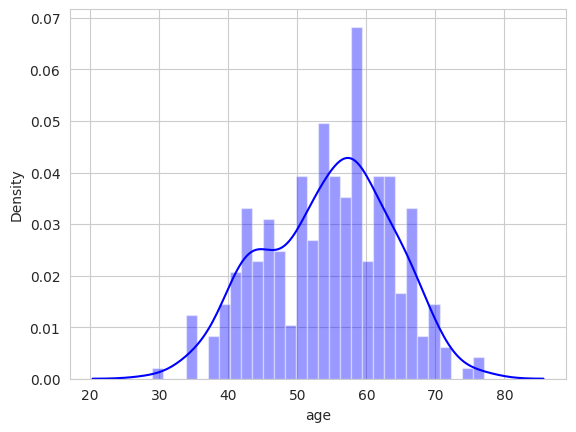

In [ ]:
from warnings import filterwarnings

# set the background style of the plot
sns.set_style('whitegrid')
sns.distplot(df['age'], kde = True, color ='blue', bins = 30)


/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.



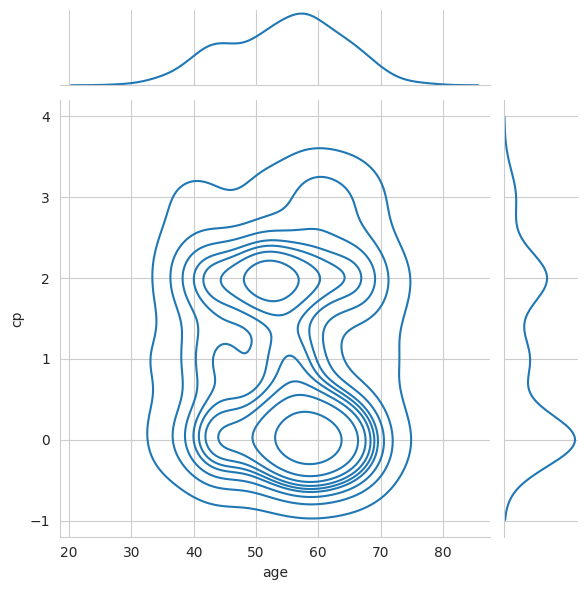

In [ ]:
sns.jointplot(x ='age', y ='cp', data = df, kind ='kde')


# **pie chat plot**

In [ ]:
import plotly.express as px

def plot_pie_charts(df):
    # Iterate over each column in the DataFrame
    for column in df.columns:
        # Count the frequency of each unique value in the column
        value_counts = df[column].value_counts()

        # Plot a pie chart for the distribution of values
        fig = px.pie(names=value_counts.index, values=value_counts.values, title=f'Pie Chart for {column}')
        fig.show()

# Call the function with your DataFrame
plot_pie_charts(df)


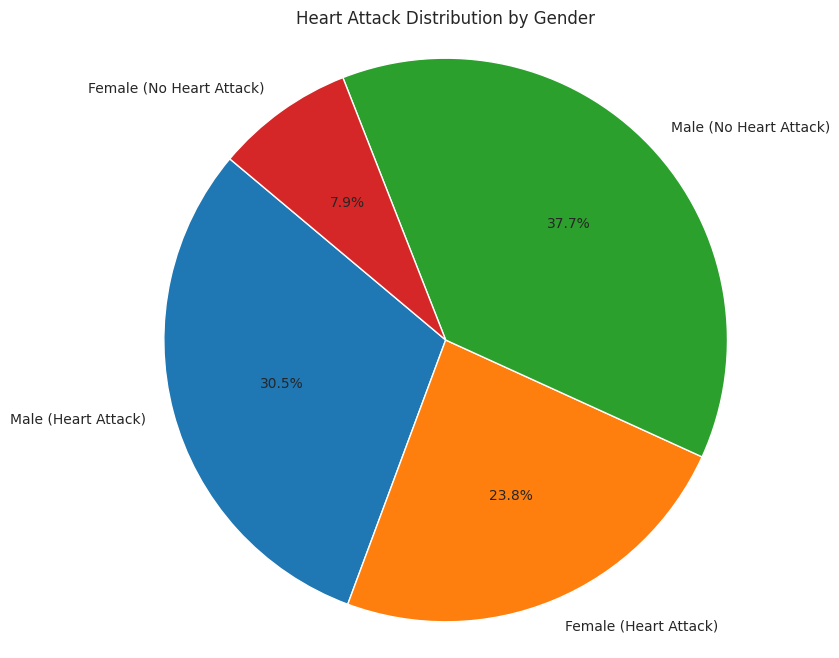

In [ ]:
# Calculate the count of heart attacks (output) for each gender (sex)
male_heart_attack_chances = df[(df['sex'] == 1) & (df['output'] == 1)].shape[0]
female_heart_attack_chances = df[(df['sex'] == 0) & (df['output'] == 1)].shape[0]

# Calculate the count of no heart attacks (output) for each gender (sex)
male_no_heart_attack_chances = df[(df['sex'] == 1) & (df['output'] == 0)].shape[0]
female_no_heart_attack_chances = df[(df['sex'] == 0) & (df['output'] == 0)].shape[0]

# Create data for the pie chart
labels = ['Male (Heart Attack)', 'Female (Heart Attack)', 'Male (No Heart Attack)', 'Female (No Heart Attack)']
sizes = [male_heart_attack_chances, female_heart_attack_chances, male_no_heart_attack_chances, female_no_heart_attack_chances]

# Plot the pie chart
plt.figure(figsize=(8, 8))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140)
plt.title('Heart Attack Distribution by Gender')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle
plt.show()


# **scatter plot**

In [ ]:
fig = px.scatter(df, x='age', color='sex', title='Scatter Plot of Age with Sex')
fig.show()

# **histogram**
##### distribution histogram plots

In [ ]:
import numpy as np
from scipy.stats import shapiro, normaltest, skew, kurtosis

def determine_distribution_type(data):
    # Shapiro-Wilk test for normality
    _, shapiro_pval = shapiro(data)

    # D'Agostino and Pearson's test for normality
    _, normaltest_pval = normaltest(data)

    # Skewness
    data_skewness = skew(data)

    # Kurtosis
    data_kurtosis = kurtosis(data)

    # Binomial distribution (if data is binary)
    if len(np.unique(data)) == 2:
        return 'Binomial'

    # Poisson distribution (if data has low skewness and kurtosis)
    if abs(data_skewness) < 1 and abs(data_kurtosis) < 1:
        return 'Poisson'

    # Exponential distribution (if data has high skewness)
    if data_skewness > 1:
        return 'Exponential'

    # Gamma distribution (if data has low skewness and high kurtosis)
    if abs(data_skewness) < 1 and data_kurtosis > 1:
        return 'Gamma'

    # Beta distribution (if data is between 0 and 1)
    if np.min(data) >= 0 and np.max(data) <= 1:
        return 'Beta'

    # Uniform distribution (if data has constant probability density)
    if shapiro_pval > 0.05 and normaltest_pval > 0.05:
        return 'Uniform'

    # Log-normal distribution (if log-transformed data is normally distributed)
    log_data = np.log(data)
    _, log_shapiro_pval = shapiro(log_data)
    _, log_normaltest_pval = normaltest(log_data)
    if log_shapiro_pval > 0.05 and log_normaltest_pval > 0.05:
        return 'Log-Normal'

    # Bernoulli distribution (if data has two possible outcomes)
    if len(np.unique(data)) <= 2:
        return 'Bernoulli'

    # If none of the above conditions are met, consider it as an unknown distribution
    return 'Unknown'


In [ ]:
import plotly.express as px

def plot_histograms(data, cont_cols):
    for col in cont_cols:
        # Determine the type of distribution based on the column name or properties
        distribution_type = determine_distribution_type(data[col])

        # Create histogram with Plotly Express
        fig = px.histogram(data, x=col, color='sex', title=f'Histogram of {col} by Sex')

        # Add annotation indicating the distribution type
        fig.update_layout(annotations=[dict(x=0.5, y=1.05, xanchor='center', yanchor='top',
                                            text=f"Distribution type: {distribution_type}",
                                            showarrow=False, font=dict(size=12))])

        # Show the histogram
        fig.show()

# Define cont_cols as a list of numerical column names (excluding 'sex')
cont_cols = ['age', 'trtbps', 'chol', 'thalachh', 'oldpeak', 'caa', 'thall', 'output']  # Example list of numerical column names

# Call the function with your DataFrame and list of numerical column names
plot_histograms(df, cont_cols)


/opt/conda/lib/python3.10/site-packages/plotly/express/_core.py:2065: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.



/opt/conda/lib/python3.10/site-packages/plotly/express/_core.py:2065: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.



/opt/conda/lib/python3.10/site-packages/plotly/express/_core.py:2065: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.



/opt/conda/lib/python3.10/site-packages/plotly/express/_core.py:2065: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.



/opt/conda/lib/python3.10/site-packages/plotly/express/_core.py:2065: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.



/opt/conda/lib/python3.10/site-packages/plotly/express/_core.py:2065: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.



/opt/conda/lib/python3.10/site-packages/plotly/express/_core.py:2065: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.



/opt/conda/lib/python3.10/site-packages/plotly/express/_core.py:2065: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.



/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warn

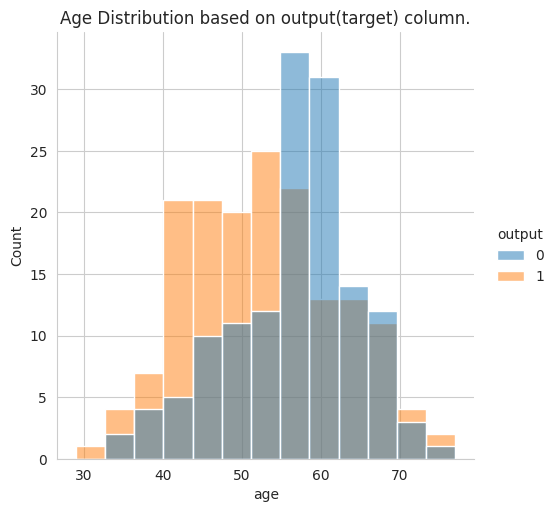

In [ ]:
sns.displot(df, x='age', hue='output', color='red', bins='auto')
plt.title("Age Distribution based on output(target) column.")
plt.show()

# **correlation matrix**

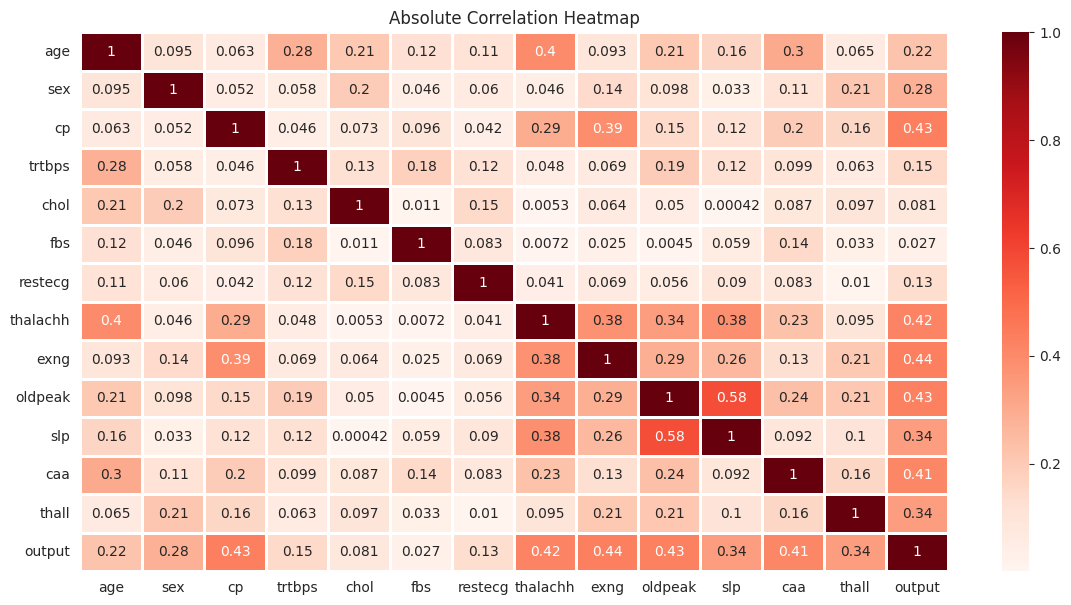

In [ ]:
# Assuming new_df is defined as your DataFrame
plt.figure(figsize=(14, 7))
corr = df.corr()
sns.heatmap(abs(corr), linewidths=1, annot=True, cmap="Reds")
plt.title('Absolute Correlation Heatmap')
plt.show()

# **Feature Engineering**
### **feature selection**

In [ ]:
# selecting the target feature
X = df.drop('output', axis=1)
y = df['output']

In [ ]:
# spliting the data x and y
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# **scaler and normalization**

In [ ]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler
mms = MinMaxScaler()
mms.fit_transform(X_train, y_train)

array([[0.27083333, 1.        , 0.33333333, ..., 1.        , 0.        ,
        0.66666667],
       [0.8125    , 1.        , 0.66666667, ..., 0.5       , 0.        ,
        1.        ],
       [0.79166667, 1.        , 0.        , ..., 0.5       , 0.5       ,
        1.        ],
       ...,
       [0.83333333, 1.        , 1.        , ..., 0.5       , 0.25      ,
        0.66666667],
       [0.66666667, 1.        , 1.        , ..., 0.5       , 0.5       ,
        0.66666667],
       [0.70833333, 0.        , 0.33333333, ..., 1.        , 0.5       ,
        0.66666667]])

### we analysis values between 0 to 1 in minmax scaling

In [ ]:
ss = StandardScaler()
ss.fit_transform(X_train, y_train)

array([[-1.350641  ,  0.73145871,  0.        , ...,  0.96543644,
        -0.68348955, -0.54576155],
       [ 1.48742624,  0.73145871,  0.9664929 , ..., -0.68470669,
        -0.68348955,  1.14050171],
       [ 1.37826981,  0.73145871, -0.9664929 , ..., -0.68470669,
         1.35010281,  1.14050171],
       ...,
       [ 1.59658267,  0.73145871,  1.9329858 , ..., -0.68470669,
         0.33330663, -0.54576155],
       [ 0.72333121,  0.73145871,  1.9329858 , ..., -0.68470669,
         1.35010281, -0.54576155],
       [ 0.94164408, -1.36713116,  0.        , ...,  0.96543644,
         1.35010281, -0.54576155]])

## we have scaled values between 1 to -1

# **Model Evaluation:**

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score

#Boosting Algorithms
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier

from sklearn.metrics import confusion_matrix,accuracy_score, precision_score, recall_score, f1_score

# **RandomForestClassifier**

In [ ]:
rfc = RandomForestClassifier()
scores = cross_val_score(rfc, X, y, cv=5)

# Train the model
rfc.fit(X_train, y_train)

y_pred = rfc.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)
print("Confusion Matrix:\n", conf_matrix)

Accuracy: 0.8360655737704918
Precision: 0.8666666666666667
Recall: 0.8125
F1-score: 0.8387096774193549
Confusion Matrix:
 [[25  4]
 [ 6 26]]


# **KNeighborsClassifier**
It is a non-parametric method that makes predictions based on the similarity of data points in a given dataset. K-NN is less sensitive to outliers compared to other algorithms.

The K-NN algorithm works by finding the K nearest neighbors to a given data point based on a distance metric, such as Euclidean distance.

In [ ]:
knc = KNeighborsClassifier(n_neighbors=100)
knc.fit(X_train, y_train)

y_pred = knc.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)
print("Confusion Matrix:\n", conf_matrix)

Accuracy: 0.7377049180327869
Precision: 0.6904761904761905
Recall: 0.90625
F1-score: 0.7837837837837837
Confusion Matrix:
 [[16 13]
 [ 3 29]]


In [ ]:
# Assuming X has at least two features for visualization
feature1_index = 0  # Index of the first feature
feature2_index = 1  # Index of the second feature

# Extract features for plotting
feature1 = X_test[:, feature1_index]
feature2 = X_test[:, feature2_index]

# Plot decision boundary
plt.figure()
plt.scatter(feature1, feature2, c=y_test, cmap=plt.cm.coolwarm, edgecolors='k')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('KNN Decision Boundary')
plt.show()

InvalidIndexError: (slice(None, None, None), 0)

# **svm (support vector machine)**
The main objective of the SVM algorithm is to find the optimal hyperplane in an N-dimensional space that can separate the data points in different classes in the feature space. The hyperplane tries that the margin between the closest points of different classes should be as maximum as possible. The dimension of the hyperplane depends upon the number of features. If the number of input features is two, then the hyperplane is just a line. If the number of input features is three,

In [ ]:
svm = SVC()
svm.fit(X_train, y_train)

y_pred = svm.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)
print("Confusion Matrix:\n", conf_matrix)

# **GradientBoostingClassifier**
Gradient Boosting is a powerful boosting algorithm that combines several weak learners into strong learners.

In [ ]:
gbc = GradientBoostingClassifier()
gbc.fit(X_train, y_train)

y_pred = gbc.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)
print("Confusion Matrix:\n", conf_matrix)

# **AdaBoostClassifier**
AdaBoost uses simple decision trees with one split known as the decision stumps of weak learners.
AdaBoost is more susceptible to noise and outliers in the data, as it assigns high weights to misclassified samples.

In [ ]:
adc = AdaBoostClassifier()
adc.fit(X_train, y_train)

y_pred = adc.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)
print("Confusion Matrix:\n", conf_matrix)

## chek which model is best

In [ ]:
# Define classifiers
classifiers = {
    "Random Forest": RandomForestClassifier(),
    "KNN": KNeighborsClassifier(n_neighbors=100),
    "SVM": SVC(),
    "Gradient Boosting": GradientBoostingClassifier()
}

# Split the data into training and testing sets
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize variables to store the best algorithm and its performance
best_algorithm = None
best_accuracy = 0

# Loop through each classifier
for name, clf in classifiers.items():
    # Train the classifier
    clf.fit(X_train, y_train)

    # Make predictions on the test set
    y_pred = clf.predict(X_test)

    # Calculate accuracy
    accuracy = accuracy_score(y_test, y_pred)

    # Print performance metrics
    print(f"{name} - Accuracy: {accuracy:.4f}")

    # Update best algorithm if the current one has higher accuracy
    if accuracy > best_accuracy:
        best_accuracy = accuracy
        best_algorithm = name

print(f"\nBest Algorithm: {best_algorithm} with Accuracy: {best_accuracy:.4f}")

# **observation heart attack**
1. In this dataset, there were 206 males and 96 females.

2. The chance of a heart attack in males was 30.5%.

3. The chance of a heart attack in females was 23.8%.

4. The percentage of individuals experiencing chest pain (cp) was 47.4%.

5. There were 35 males with a blood pressure (trtbps) range of 120-124 and 17 females with a blood pressure range of 130-134.

6. The heart rate achieved was observed in 24 males with a thalach (maximum heart rate achieved) range of 140-144 and 15 females with a range of 160-164.

7. Approximately 67.2% of the people included in the dataset experienced exercise-induced angina.**